LV-4 LUKŠA ANDRAČIĆ
LINEARNA REGRESIJAž

In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
data = pd.read_csv('/content/sample_data/energydata_complete.csv')
# Provjera strukture podataka i nedostajućih vrijednosti
print(data.info())
print(data.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

Korak 1

Dataset sadrži 28 featurea i 19735 instanci. Sadrži podatke o temperaturama i vlažnosti na različitim mjestima. Podaci su int64 i float 64 tipa. U datasetu nema nedostajućih vrijednosti.

In [4]:
# 2. Deskriptivna statistika za odabrane varijable
selected_variables = ['RH_1', 'RH_out', 'Tdewpoint', 'T_out']
descriptive_stats = data[selected_variables].describe()
print("Deskriptivna statistika za odabrane varijable:")
print(descriptive_stats)

Deskriptivna statistika za odabrane varijable:
               RH_1        RH_out     Tdewpoint         T_out
count  19735.000000  19735.000000  19735.000000  19735.000000
mean      40.259739     79.750418      3.760707      7.411665
std        3.979299     14.901088      4.194648      5.317409
min       27.023333     24.000000     -6.600000     -5.000000
25%       37.333333     70.333333      0.900000      3.666667
50%       39.656667     83.666667      3.433333      6.916667
75%       43.066667     91.666667      6.566667     10.408333
max       63.360000    100.000000     15.500000     26.100000


Korak 2:

Izabrane su varijable RH_1, RH_out Tdewpoint i T_out. RH_1 i RH_out su odabrane jer su obije varijable sa podacima o vlažnosti, samo na različitim mjestima. Tdewpoint i T_out su odabrane da vidimo kako se odnose temperature na različitim mjestima.

Apsolutne srednje vrijednosti su 40.259739,	79.750418,	3.760707,	7.411665.

Korak 3:

Cijlna varijabla je RH_out, a nezavisna varijabla je RH_1. Pretpostavka je da će njihova veza biti linearna.(H0(1))

Cijlna varijabla je Tdewpoint, a nezavisna varijabla je T_out. Pretpostavka je da će njihova veza biti linearna.(H0(2))

Slope: 0.07320467847320657
Intercept: 34.42163556913246
R-value: 0.2741260131575628
P-value: 0.0
Standard error: 0.0018282216071897623


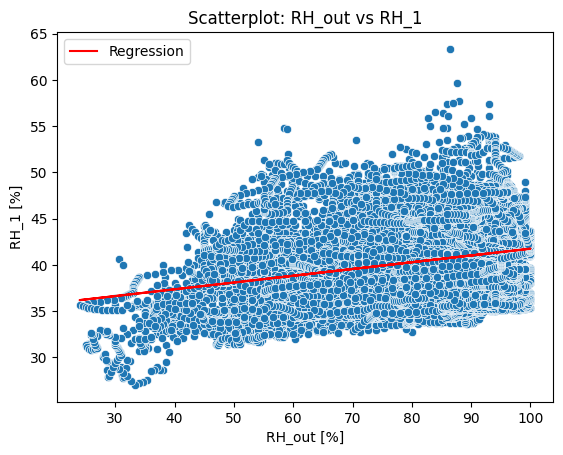

Jednadžaba regresije je: RH_out=  {34.42163556913246} + {0.07320467847320657} *RH_1


In [7]:
slope, intercept, r_value, p_value, std_err = stats.linregress(data['RH_out'], data['RH_1'])
print("Slope:", slope)
print("Intercept:", intercept)
print("R-value:", r_value)
print("P-value:", p_value)
print("Standard error:", std_err)

sns.scatterplot(x=data['RH_out'], y=data['RH_1'])
plt.plot(data['RH_out'], intercept + slope * data['RH_out'], color='red', label='Regression')
plt.xlabel('RH_out [%]')
plt.ylabel('RH_1 [%]')
plt.title('Scatterplot: RH_out vs RH_1')
plt.legend()
plt.show()

print("Jednadžaba regresije je: RH_out= ", {intercept}, "+",{slope},"*RH_1" )

Slope: 1.0022939281398429
Intercept: 3.642330898078785
R-value: 0.7906614310468055
P-value: 0.0
Standard error: 0.005525089946183271


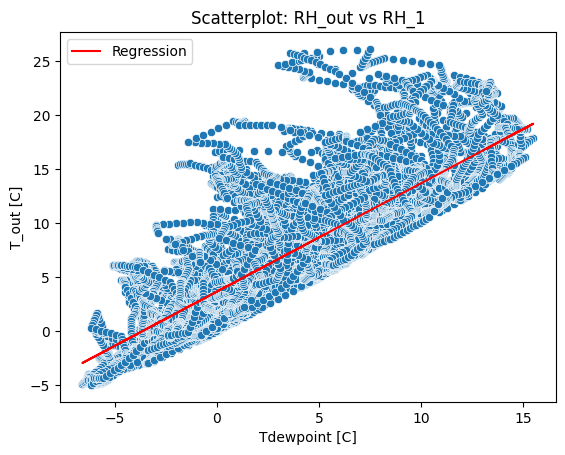

Jednadžaba regresije je: Tdewpoint=  {3.642330898078785} + {1.0022939281398429} *T_out


In [8]:
slope, intercept, r_value, p_value, std_err = stats.linregress(data['Tdewpoint'], data['T_out'])
print("Slope:", slope)
print("Intercept:", intercept)
print("R-value:", r_value)
print("P-value:", p_value)
print("Standard error:", std_err)

sns.scatterplot(x=data['Tdewpoint'], y=data['T_out'])
plt.plot(data['Tdewpoint'], intercept + slope * data['Tdewpoint'], color='red', label='Regression')
plt.xlabel('Tdewpoint [C]')
plt.ylabel('T_out [C]')
plt.title('Scatterplot: Tdewpoint vs T_out')
plt.legend()
plt.show()

print("Jednadžaba regresije je: Tdewpoint= ", {intercept}, "+",{slope},"*T_out" )

Korak 4:


RH_out/RH_1
Procjenjeni su parametri regresijskog modela( nagib = 0.073, odsjećak na y osi = 34.42). Jednadža regresije je RH_out=34.42+0.07*RH_1.


Tdewpoint/T_out
Procjenjeni su parametri regresijskog modela( nagib = 1.002, odsjećak na y osi = 3.64). Jednadža regresije je Tdewpoint= 3.642330898078785 + 1.0022939281398429 *T_out.


In [11]:
# 3. Interval povjerenja za populacijski nagib
confidence_level = 0.95
n = len(data)
t_critical = stats.t.ppf((1 + confidence_level) / 2, df=n-2)
margin_of_error = t_critical * std_err
lower_bound = slope - margin_of_error
upper_bound = slope + margin_of_error
print(f"Interval povjerenja za populacijski nagib ({confidence_level*100}%): ({lower_bound:.4f}, {upper_bound:.4f})")

# Interpretacija intervala povjerenja
print("Interval povjerenja nam govori da s 95% sigurnošću vjerujemo da je stvarni nagib između {:.4f} i {:.4f}.".format(lower_bound, upper_bound))


Interval povjerenja za populacijski nagib (95.0%): (0.9915, 1.0131)
Interval povjerenja nam govori da s 95% sigurnošću vjerujemo da je stvarni nagib između 0.9915 i 1.0131.


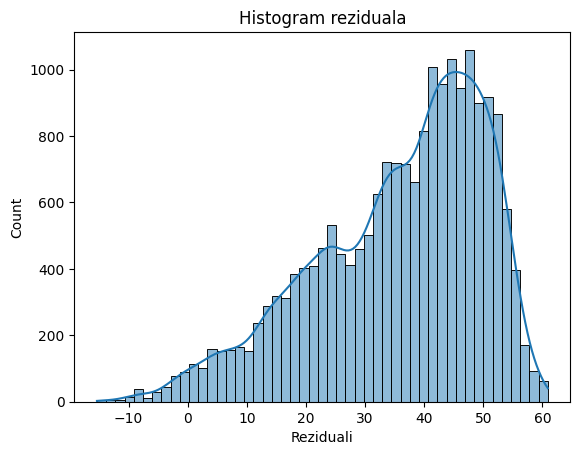

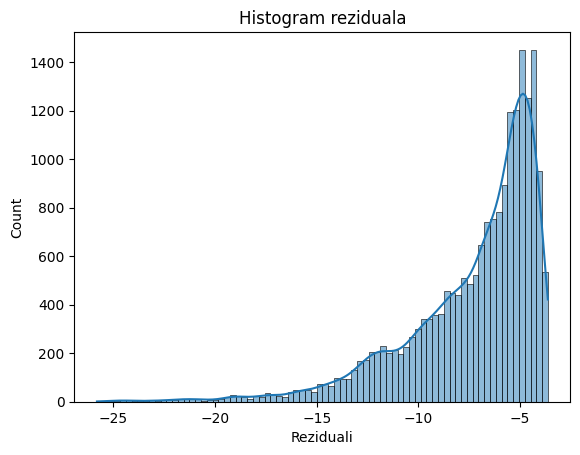

In [13]:
# 2. Provjera reziduala (neovisnost pogrešaka)
residuals = data['RH_out'] - (intercept + slope * data['RH_1'])

# 3. Provjera normalnosti reziduala
sns.histplot(residuals, kde=True)
plt.xlabel('Reziduali')
plt.title('Histogram reziduala')
plt.show()

# 2. Provjera reziduala (neovisnost pogrešaka)
residuals = data['Tdewpoint'] - (intercept + slope * data['T_out'])

# 3. Provjera normalnosti reziduala
sns.histplot(residuals, kde=True)
plt.xlabel('Reziduali')
plt.title('Histogram reziduala')
plt.show()

In [16]:
r_value, p_value = stats.pearsonr(data['RH_out'], data['RH_1'])
print(f"Pearsonov koeficijent korelacije (r): {r_value}")

r_value, p_value = stats.pearsonr(data['Tdewpoint'], data['T_out'])
print(f"Pearsonov koeficijent korelacije (r): {r_value}")

Pearsonov koeficijent korelacije (r): 0.2741260131575629
Pearsonov koeficijent korelacije (r): 0.7906614310468054
